# Module Test Template

## Module & Test Description
This Notebook is used for developing and testing functions relating to the PM generator in *concrete.py*

### Imports
##### General Imports

In [1]:
import os, sys, pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc
import shapely as sh

In [2]:
import math

##### Extend PYPATH to current folder:
This allows importing libraries from the same folder; <code>pathlib.Path().resolve()</code> returns the path of the current directory.

In [3]:
sys.path.extend([pathlib.Path().resolve()])

Import specific testing modules:

In [4]:
import rcmaterials as mat

materials.py <version 0.0.6> successfully imported


In [5]:
from rccolumn import *

##### Column Input Parameters

In [6]:
bw = 16
h = 16
concrete5 = mat.ConcreteMaterial(5000)
rebar60 = mat.RebarMaterial(60000)
layer_distances = np.array([2.5, 12])
layer_areas = np.array([rebar60.bar_areas[9], rebar60.bar_areas[9]]) * 4

#### Compression Point

In [7]:
p_max = max_axial(bw * h, layer_areas, concrete5, rebar60)
p_max

1534000.0

In [8]:
for i in range(layer_distances.shape[0]):
    print(layer_strain(layer_distances[i], comp_c, concrete5, rebar60))

0.002999999925
0.0029999996399999998


In [9]:
for i in range(layer_distances.shape[0]):
    print(layer_stress(layer_distances[i], comp_c, concrete5, rebar60))

60000.0
60000.0


In [10]:
for i in range(layer_distances.shape[0]):
    print(layer_force(layer_areas[i], layer_distances[i], comp_c, concrete5, rebar60))

223000.0
223000.0


In [11]:
sum_layer_forces(layer_areas, layer_distances, comp_c, concrete5, rebar60)

446000.0

In [12]:
sum_total_forces(comp_c, bw, h, layer_distances, layer_areas, concrete5, rebar60)

1534000.0

In [13]:
sum_total_forces(comp_c, bw, h, layer_distances, layer_areas, concrete5, rebar60) == p_max

True

### Create P-M Diagram

In [14]:
d = max(layer_distances)
z_max = max_z(concrete5, rebar60)
z_values = np.array([z_max, 1, 0.5, 0, -0.5, -1, -2, -3, -4, -10, -20, -50])
c_values = np.zeros(z_values.shape[0])
for i in range(z_values.shape[0]):
    c_values[i] = c_from_z(z_values[i], d, concrete5, rebar60)
c_values

array([1.00000000e+08, 3.86666667e+01, 1.83157895e+01, 1.20000000e+01,
       8.92307692e+00, 7.10204082e+00, 5.04347826e+00, 3.91011236e+00,
       3.19266055e+00, 1.51965066e+00, 8.11188811e-01, 3.38192420e-01])

In [15]:
P = np.zeros(z_values.shape[0])
M = np.zeros(z_values.shape[0])
for i in range(z_values.shape[0]):
    P[i] = sum_total_forces(c_values[i], bw, h, layer_distances, layer_areas, concrete5, rebar60)
    M[i] = sum_total_moments(c_values[i], bw, h, layer_distances, layer_areas, concrete5, rebar60)

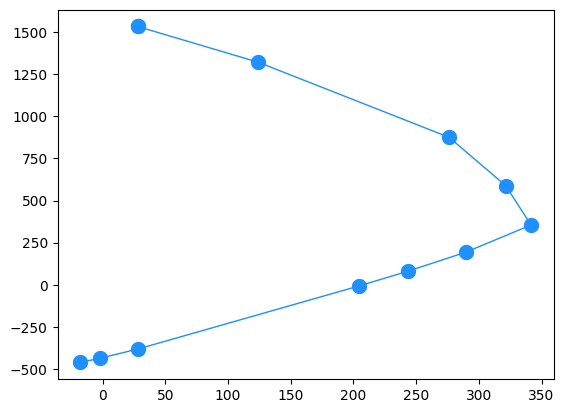

In [16]:
plt.scatter(M/12000, P/1000, color='dodgerblue', linewidth=5)
plt.plot(M/12000, P/1000, color='dodgerblue', linewidth=1)

### Create Backside P-M Diagram

In [17]:
layer_distances_rev = np.flip(h - layer_distances)
layer_areas_rev = np.flip(layer_areas)

In [18]:
d_rev = max(layer_distances_rev)
z_max = max_z(concrete5, rebar60)
z_values_rev = np.flip(np.array([z_max, 1, 0.5, 0, -0.5, -1, -2, -3, -4, -10, -20, -50]))
c_values_rev = np.zeros(z_values_rev.shape[0])
for i in range(z_values_rev.shape[0]):
    c_values_rev[i] = c_from_z(z_values_rev[i], d_rev, concrete5, rebar60)

In [19]:
P_rev = np.zeros(z_values_rev.shape[0])
M_rev = np.zeros(z_values_rev.shape[0])
for i in range(z_values_rev.shape[0]):
    P_rev[i] = sum_total_forces(c_values_rev[i], bw, h, layer_distances, layer_areas, concrete5, rebar60)
    M_rev[i] = sum_total_moments(c_values_rev[i], bw, h, layer_distances, layer_areas, concrete5, rebar60)

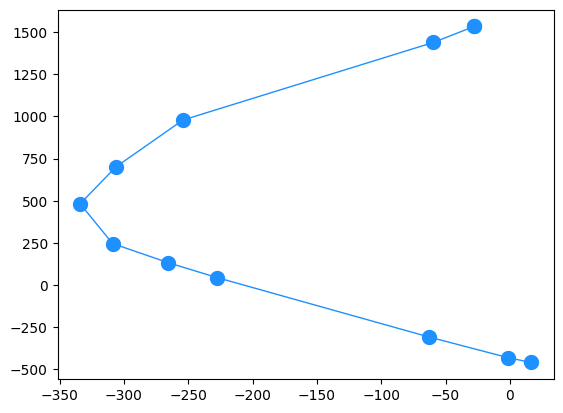

In [20]:
plt.scatter(-M_rev/12000, P_rev/1000, color='dodgerblue', linewidth=5)
plt.plot(-M_rev/12000, P_rev/1000, color='dodgerblue', linewidth=1)

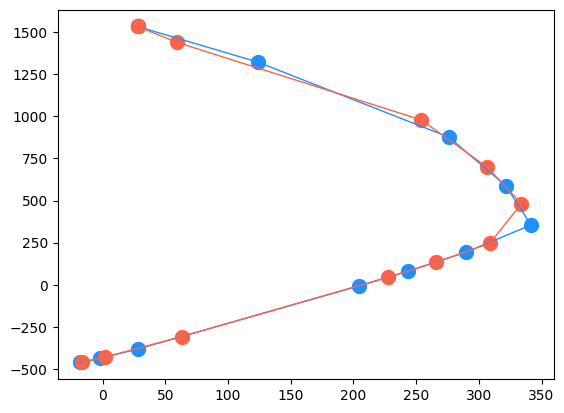

In [21]:
plt.scatter(M/12000, P/1000, color='dodgerblue', linewidth=5)
plt.plot(M/12000, P/1000, color='dodgerblue', linewidth=1)
plt.scatter(M_rev/12000, P_rev/1000, color='tomato', linewidth=5)
plt.plot(M_rev/12000, P_rev/1000, color='tomato', linewidth=1)

In [22]:
z_m = z_at_pure_m(bw, h, layer_distances, layer_areas, concrete5, rebar60)
z_m

-3.905143417258064

In [23]:
c_m = c_from_z(z_m, max(layer_distances), concrete5, rebar60)
c_m

3.2492126996869737

In [24]:
PM_m = pm_points(c_m, bw, h, layer_distances, layer_areas, concrete5, rebar60)
PM_m[0]/1000, PM_m[1]/12000

(6.819027476012707e-11, 207.68035578552673)

In [25]:
d = max(layer_distances)
c_6 = c_from_z(-1, d, concrete5, rebar60)
c_8a = c_from_strain(-0.004, d, concrete5)
c_6, c_8a

(7.1020408163265305, 5.142857142857143)

In [26]:
c_8 = c_from_strain(-0.005, d, concrete5)
c_8

4.499999999999999

In [27]:
new_layers = np.array([2.5, 10])
h - new_layers

array([13.5,  6. ])

In [28]:
np.flip(h - new_layers)

array([ 6. , 13.5])